In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [2]:
stats.binom(n=1, p=0.5).rvs(10)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [3]:
def flip_coin(n_flips, p=0.7):
    return stats.binom(n=1, p=p).rvs(n_flips)

In [4]:
flips = flip_coin(1000)

In [5]:
np.mean(flips)

0.697

In [6]:
flips = flip_coin(1000, p=0.5)

In [7]:
np.mean(flips)


0.486

In [8]:
a = list(range(10,1001,10))

In [9]:
b = list(map(np.mean,map(flip_coin, a)))

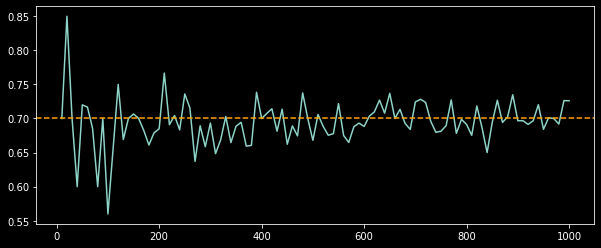

In [10]:
fig, ax = plt.subplots(1, figsize=(10,4))
ax.plot(a,b)
ax.axhline(y=0.7, color='orange', linestyle='--')

In [11]:
def make_sample_mean_path(begin, end, step, p=0.5):
    list_ = list(range(begin, end+1, step))
    b = list(map(np.mean,[flip_coin(x, p=p) for x in list_]))
    return list_, b
        
        

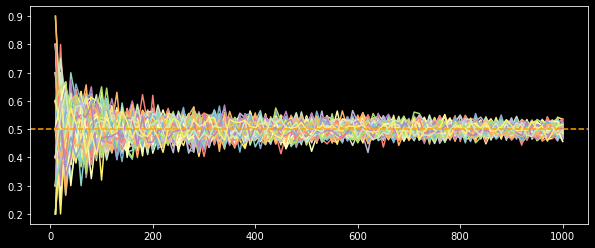

In [12]:
fig, ax = plt.subplots(1, figsize=(10,4))
for _ in range(100):
    x,y = make_sample_mean_path(10, 1000, 10)
    ax.plot(x, y)
ax.axhline(y=0.5, color='orange', linestyle='--')

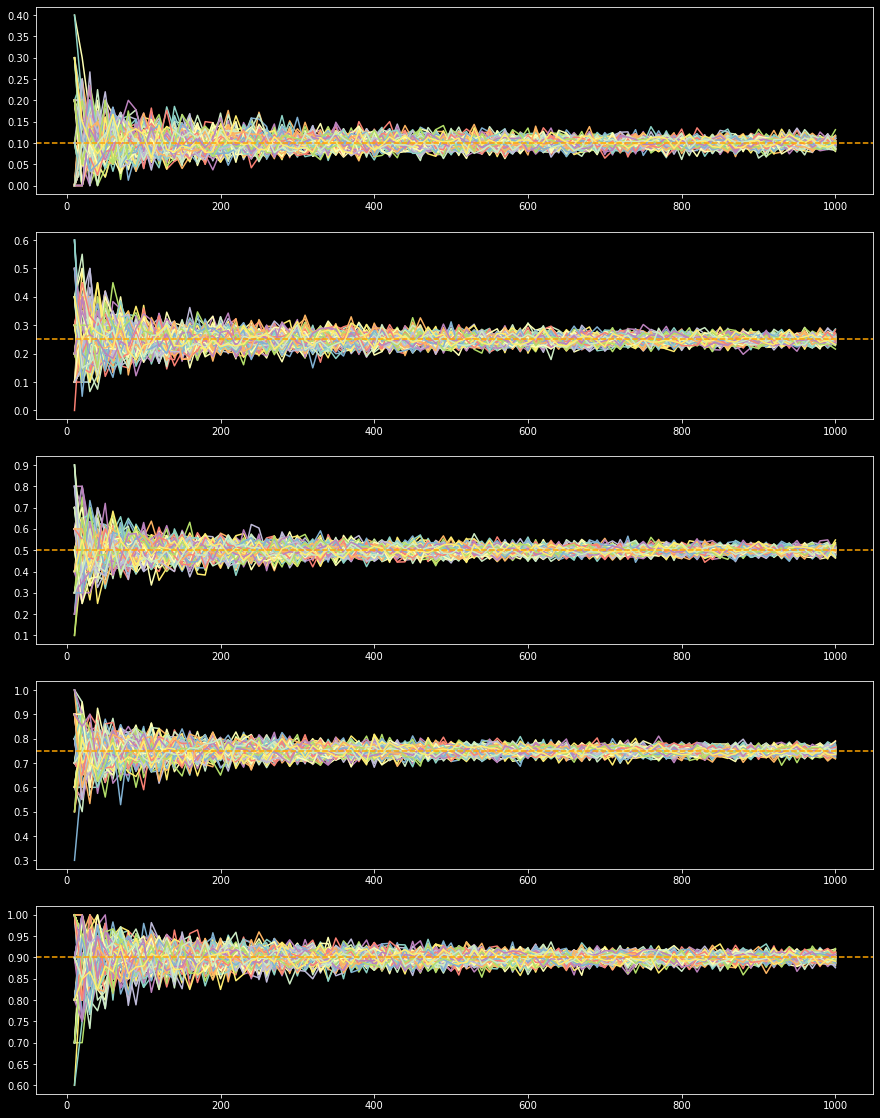

In [13]:
p_list = [0.1, .25, 0.5, 0.75, 0.9]
fig = plt.figure(figsize=(15,20))
for i in range(5):
    ax = fig.add_subplot(5, 1, i+1)
    for _ in range(100):
        x,y = make_sample_mean_path(10, 1000, 10, p_list[i])
        ax.plot(x, y)
    ax.axhline(y=p_list[i], color='orange', linestyle = '--')

In [14]:
fairness = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

s_var = []
for fair in fairness:
    s_mean = []
    for _ in range(100):
        s_mean.append(np.mean(flip_coin(10, p=fair)))
    s_var.append(np.var(s_mean))
s_var

[0.0,
 0.006275,
 0.014424,
 0.024795999999999995,
 0.020595999999999996,
 0.021799999999999993,
 0.020323999999999995,
 0.021675000000000003,
 0.019196000000000005,
 0.009796,
 0.0]

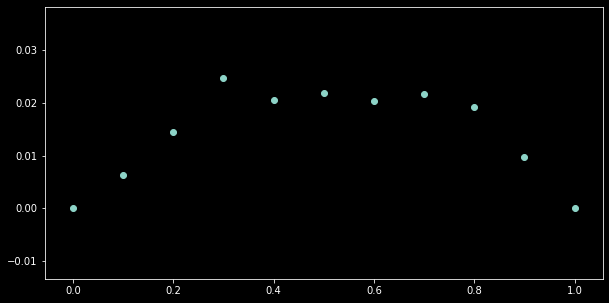

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(fairness, s_var)